In [4]:
#: the usual imports
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

plt.style.use('fivethirtyeight')

# Lecture 20

### Prediction & Regression

# Prediction

## Prediction Problems

* Predicting one characteristic based on another:
    - Given my height, how tall will my kid be as an adult?
    - Given my education level, what is my income?
    - Given my income, how much does my car cost?
    
* Two characteristics: one is known; one is unknown
* Have data for which we know both characteristics
* To predict, need an association

### Predict child height from height of parents

* Use mid-parent height as before.
* observation: Children of shorter parents tend to be shorter

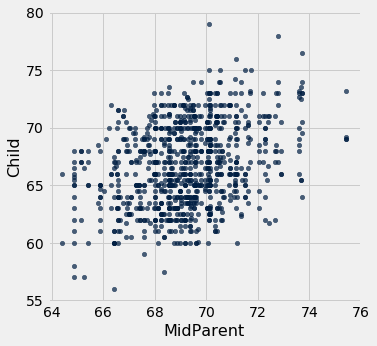

In [5]:
#:
galton = Table.read_table('galton.csv')

heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
    )

heights.scatter(0)

### Predict child height from height of parents
* For a given child, predict their height by:
    - restricting ourselves to all midparents within $\pm 0.5$ inches of the child's midparent height;
    - averaging the height of all children of those midparents.

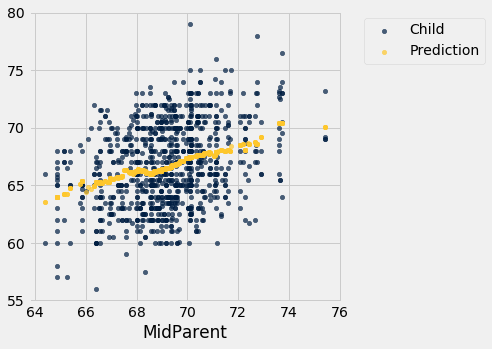

In [6]:
#:
def predict_child(parent):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of parent.
    """
    close_points = heights.where('MidParent', are.between(parent - 0.5, parent + 0.5))
    return close_points.column('Child').mean()

heights_and_predict = heights.with_column(
    'Prediction', heights.apply(predict_child, 'MidParent')
)

heights_and_predict.scatter(0)

## Graph of Averages
A visualization of x and y pairs
* Group each x value with other nearby x values
* Average the corresponding y values for each group
* For each x value, produce one predicted y value

## Child height prediction, with correlation!
* Calculate the correlation between `midparentHeight` and `childHeight`

In [8]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)

In [9]:
def standardize(t):
    """Return a table in which all columns of t are converted to standard units."""
    t_su = Table()
    for label in t.labels:
        t_su = t_su.with_column(label + ' (su)', standard_units(t.column(label)))
    return t_su

In [10]:
heights_su = standardize(heights)
heights_su

MidParent (su),Child (su)
3.45465,1.80416
3.45465,0.686005
3.45465,0.630097
3.45465,0.630097
2.47209,1.88802
2.47209,1.60848
2.47209,-0.348285
2.47209,-0.348285
1.58389,1.18917
1.58389,0.350559


In [11]:
r = np.mean(heights_su.column('MidParent (su)') * heights_su.column('Child (su)'))
r

0.32094989606395924

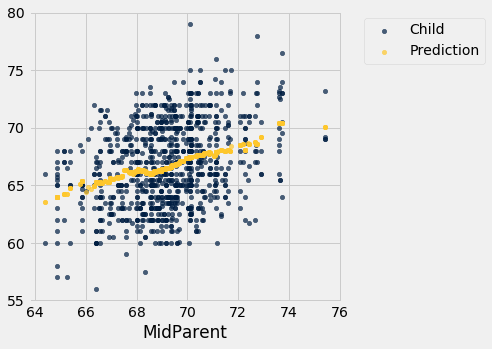

In [12]:
heights_and_predict.scatter(0)

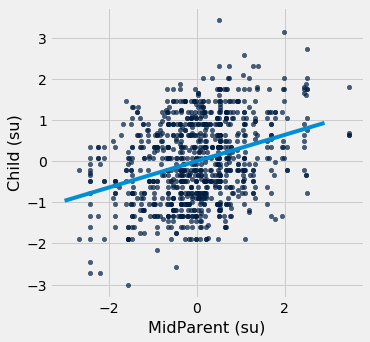

In [13]:
heights_su.scatter(0)
plt.plot(np.arange(-3, 3, 0.1), np.arange(-3, 3, 0.1) * r);

## Using the correlation coefficient for prediction
In standard units:
* The line through $(0,0)$ with slope $r$ is called the regression line.
* If the association between attributes is linear, the graph of averages is approximately the regression line.
* If the line is given by $f(x) = mx + b$, then the prediction for $x$ is given by $f(x)$.

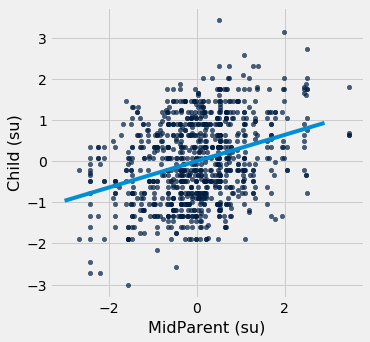

In [14]:
heights_su.scatter(0)
plt.plot(np.arange(-3, 3, 0.1), np.arange(-3, 3, 0.1) * r);

### Regression to the mean

* The regression line predicts:
    - Parent's whose mid-parent height is ~2 su have children with height ~0.6 su.
    - We predict that the child will be somewhat closer to average than their parents.
* This is a consequence of the slope having magnitude less than 1.

## Regression to the Mean
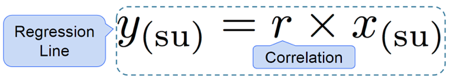

* If $r = 0.6$, and the given $x$ is 2 standard units, then:
    - The given $x$ is 2 SDs above average
    - The prediction for $y$ is 1.2 SDs above average

* On average (though not for each individual), regression predicts $y$ to be closer to the mean than $x$.

# Examples with different slopes

In [44]:
def resize_window(lim=3.5):
    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)

In [58]:
def draw_line(slope=0, intercept=0, x=make_array(-4, 4), color='r'):
    y = x*slope + intercept
    plt.plot(x, y, color=color)

In [52]:
def predict_y(x_val):
    """
    Predicts y-values for the example table using points within an x-value of 0.25
    """
    nearby_points = example.where('x', are.between(x_val - 0.25, x_val + 0.25))
    return np.mean(nearby_points.column('y'))

In [50]:
r = 0.99
example = r_table(r)
example

x,y
0.0912047,-0.0680119
1.09128,1.04391
-1.94697,-1.88316
-1.38635,-1.34674
-2.29649,-2.14933
2.40983,2.59627
1.72784,1.76089
2.20456,2.5933
0.794828,0.778249
0.976421,1.18139


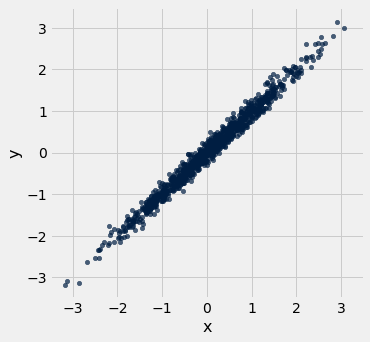

In [51]:
example.scatter('x', 'y')
resize_window()

In [53]:
example = example.with_column(
    'Predicted y',
    example.apply(predict_y, 'x'))
example

x,y,Predicted y
0.0912047,-0.0680119,0.104202
1.09128,1.04391,1.05235
-1.94697,-1.88316,-1.85456
-1.38635,-1.34674,-1.32041
-2.29649,-2.14933,-2.17514
2.40983,2.59627,2.41498
1.72784,1.76089,1.70671
2.20456,2.5933,2.12065
0.794828,0.778249,0.791607
0.976421,1.18139,0.947165


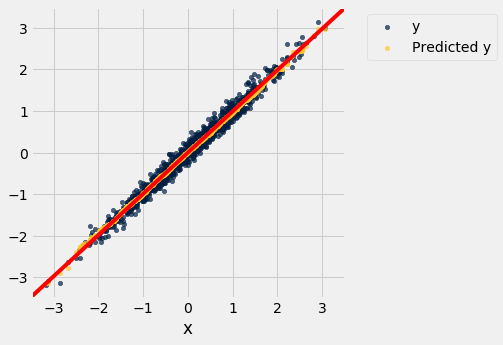

In [59]:
example.scatter('x')
resize_window()
draw_line(slope=r)

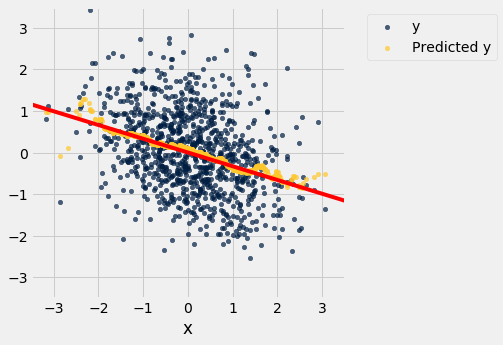

In [64]:
r = 0.33

example = r_table(r)
example = example.with_column('Predicted y', example.apply(predict_y, 'x'))
example.scatter('x')
resize_window()
draw_line(slope=r)

### Child height prediction, original units
Approach:
1. Scale mid-parent height to standard units
2. Use the correlation coefficient to predict child height
3. Scale predicted child height from standard units back to inches

In [69]:
#:
parent_mean = np.mean(heights.column('MidParent'))
parent_sd = np.std(heights.column('MidParent'))
child_mean = np.mean(heights.column('Child'))
child_sd = np.std(heights.column('Child'))

r = np.mean(heights_su.column('MidParent (su)') * heights_su.column('Child (su)'))

In [70]:
#:
def predict_with_r(parent):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of parent, 
    using linear regression.
    """
    parent_su = (parent - parent_mean) / parent_sd
    child_su = r * parent_su
    return child_su * child_sd + child_mean

In [71]:
#:
predict_with_r(56)

58.32845077988057

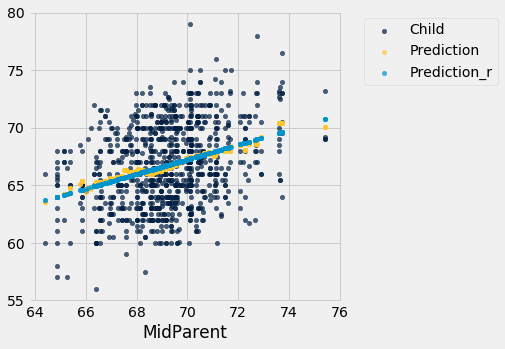

In [72]:
#:
preds = heights_and_predict.with_column('Prediction_r', heights.apply(predict_with_r, 'MidParent'))
preds.scatter(0)

### Discussion Question

A course has a midterm (average 70; standard deviation 10) and a really hard final (average 50; standard deviation 12)

If the scatter diagram comparing midterm & final scores for students looks linearly associated with correlation 0.75, then what is the predicted final exam score for a student who received a 90 on the midterm?

- A.76
- B.90
- C.68
- D.82
- E.67.5

### Answer

1. (90 - 70)/10 = 2 standard units on midterm, 
2. estimate 0.75 * 2 = 1.5 standard units on final 
3. estimated final score = 1.5 * 12 + 50 = 68 points

# Different Slopes

In [19]:
def r_table(r, num_points=1000):
    """
    Generate a table of N data points with a correlation approximately r
    """
    np.random.seed(8)
    x = np.random.normal(0, 1, num_points)
    z = np.random.normal(0, 1, num_points)
    y = r*x + (np.sqrt(1-r**2))*z
    return Table().with_columns('x', x, 'y', y)

## Slope and Intercept

* What does the regression line look like in original units?

## Regression line equation

In original units, the regression line has this equation:

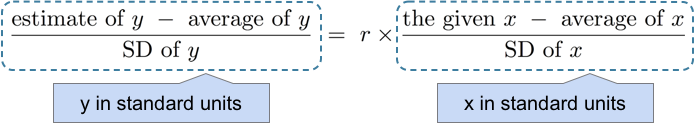


## Regression line equation:

* In standard units:
$$ y = r \times x $$
* In original units, 
    - where $m_x$, $m_y$ are the averages of $x$ and $y$
    - where $s_x$, $s_y$ are the standard deviations of $x$ and $y$,
$$\frac{(y - m_y)}{s_y} = r \times \frac{(x - m_x)}{s_x}$$
* This equation reworked into the point-slope form of a line:
$$(y - m_y) = \left(\frac{r\cdot s_y}{s_x}\right)(x - m_x)$$

* Or in the slope-intercept form:

$$y = \left(\frac{r\cdot s_y}{s_x}\right)x + \left(m_y - \frac{r\cdot s_y\cdot m_x}{s_x}\right)$$

## Slope and intercept

* The regression line is given by $y = mx + b$, where:
    - the slope $m$ is: $$m = r\cdot\frac{SD\ of\ x}{SD\ of\ y}$$
    - the y-intercept $b$ is: $$b = (avg\ of\ y) - m\cdot(avg\ of\ x)$$


## The regression line
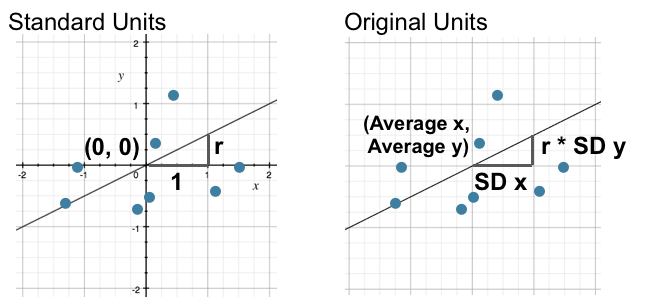

### Predict the retail price of a hybrid with acceleration of 12.5
* For each additional unit of acceleration (kph/s), how does the price change?

In [73]:
#:
def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

def slope(t, x, y):
    """The slope of the regression line (original units)"""
    r = correlation(t, x, y)
    return r * np.std(t.column(y)) / np.std(t.column(x))

def intercept(t, x, y):
    """The intercept of the regression line (original units)"""
    return np.mean(t.column(y)) - slope(t, x, y) * np.mean(t.column(x))


In [74]:
#:
hybrid = Table.read_table('hybrid.csv')
hybrid

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact
Insight,2001,19036.7,9.52,53,Two Seater
Insight,2002,19137,9.71,53,Two Seater
Alphard,2003,38084.8,8.33,40.46,Minivan
Insight,2003,19137,9.52,53,Two Seater
Civic,2003,14071.9,8.62,41,Compact


In [75]:
m = slope(hybrid, 'acceleration', 'msrp')
b = intercept(hybrid, 'acceleration', 'msrp')

y = m * 12.5 + b
y

42063.58975574111

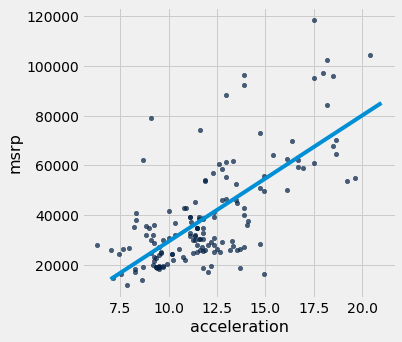

In [76]:
hybrid.scatter('acceleration', 'msrp')
x = np.arange(7,22)
plt.plot(x, m * x + b);

In [77]:
m

5067.6611059552215

### Ecological Correlations

Careful!  correlation of populations does not reflect the strength of the relationship for individuals.

In [78]:
sat2014 = Table.read_table('sat2014.csv').sort('State')
sat2014

State,Participation Rate,Critical Reading,Math,Writing,Combined
Alabama,6.7,547,538,532,1617
Alaska,54.2,507,503,475,1485
Arizona,36.4,522,525,500,1547
Arkansas,4.2,573,571,554,1698
California,60.3,498,510,496,1504
Colorado,14.3,582,586,567,1735
Connecticut,88.4,507,510,508,1525
Delaware,100,456,459,444,1359
District of Columbia,100,440,438,431,1309
Florida,72.2,491,485,472,1448


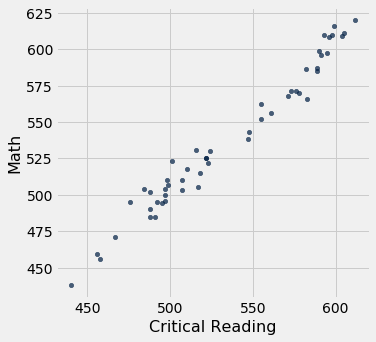

In [79]:
sat2014.scatter('Critical Reading', 'Math')

In [31]:
correlation(sat2014, 'Critical Reading', 'Math')

0.9847558411067434

# Demographics

In [82]:
demographics = Table.read_table('district_demographics2016.csv')
demographics

State,District,Median Income,Percent voting for Clinton,College%
Alabama,"Congressional District 1 (115th Congress), Alabama",47083,34.1,24
Alabama,"Congressional District 2 (115th Congress), Alabama",42035,33,21.8
Alabama,"Congressional District 3 (115th Congress), Alabama",46544,32.3,22.8
Alabama,"Congressional District 4 (115th Congress), Alabama",41110,17.4,17
Alabama,"Congressional District 5 (115th Congress), Alabama",51690,31.3,30.3
Alabama,"Congressional District 6 (115th Congress), Alabama",61413,26.1,36.7
Alabama,"Congressional District 7 (115th Congress), Alabama",34664,69.8,19.4
Alaska,"Congressional District (at Large) (115th Congress), Alaska",76440,37.6,29.6
Arizona,"Congressional District 1 (115th Congress), Arizona",50537,46.6,24.5
Arizona,"Congressional District 2 (115th Congress), Arizona",49072,49.6,34


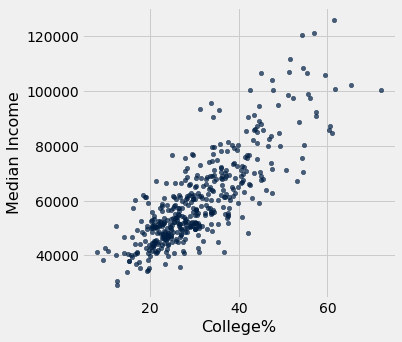

In [83]:
demographics.scatter('College%', 'Median Income')

In [84]:
correlation(demographics, 'College%', 'Median Income')

0.8184648517141335

In [85]:
demographics_slope = slope(demographics, 'College%', 'Median Income')
demographics_intercept = intercept(demographics, 'College%', 'Median Income')
(demographics_slope, demographics_intercept)

(1270.70168946388, 20802.577766677925)

In [86]:
demographics.where('College%', are.between(58, 60)).where('Median Income', are.between(100000, 120000))

State,District,Median Income,Percent voting for Clinton,College%
California,"Congressional District 12 (115th Congress), California",105918,86.2,59.5


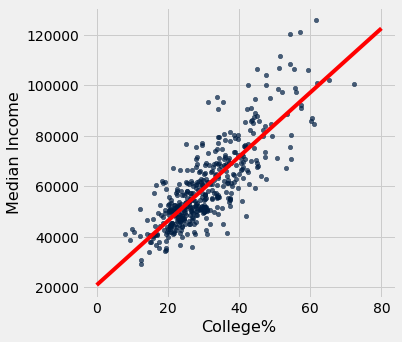

In [87]:
demographics.scatter('College%', 'Median Income')
draw_line(slope=demographics_slope, intercept=demographics_intercept, x=make_array(0, 80))